In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

# Programa para el ca'lculo de la posici'on solar

Datos de entrada

* d'ia del año
* latitud, longitud
* hora (con tiempo est'andar) (vector): calcular para cada hora del dia
* zona horaria (verano s/n)

datos de salida

* declinaci'on
* duración del d'ia
* horas de amanecer y ocaso en tiempo estandar
* posici'on del sol: altura/elevaci'on, azimut, 'angulo cenital

Gr'aficas: 'angulos en funci'on de la hora

Trabajo en equipo 

validar con otros programas

ecs

declinaci´on

delta = 0.4093 * np.sin(2 * pi * (284 + N) / 365)

latitud 

phi = arg de una func

longitud local

L_loc = 

longitud de referencia 

L_zh

omega = 15 * (t_sol - 1)

t_sol = t_est + (L_loc - L_zh) / 15 + C_1 + E_t / 60

horario de verano C_1

E_t = 9.87 * np.sin(2 * B) - 7.53 * np.cos(B) - 1.5 * np.sin(B)

B = (N - 81) * 360 / 364

t_d = 24 * omega_o / pi

omega_o = arccos(-tan(delta)*tan(phi))

usuario

N =

phi =

L_loc =

L_ref = 

zona horario C_1

t_est =

In [2]:
#in
N = 253

phi = 18.839444 * np.pi / 180

L_loc = - 99.235278 * np.pi / 180

L_zh = - 90 * np.pi / 180

C_1 = 0

t_est = 12 + 27 / 60

In [3]:
# declinacion
pi = math.pi
delta = 0.4093 * np.sin(2 * pi * (284 + N) / 365)
delta

np.float64(0.0735784635374726)

In [4]:
# duracion del dia
omega_o = np.arccos(-np.tan(delta)*np.tan(phi))
t_d = 24 * omega_o / pi
omega_a = - omega_o
omega_o

np.float64(1.595949070212344)

In [5]:
# hora amanecer y ocaso en tiempo estandar
t_so = 12 * omega_o / pi + 12

t_salba = - 12 * omega_o / pi + 12

B = (N - 81) * 2 * np.pi / 364

E_t = 9.87 * np.sin(2 * B) - 7.53 * np.cos(B) - 1.5 * np.sin(B)

t_esto = (t_so) - 12 * (L_loc - L_zh) / np.pi + C_1 + (E_t / 60)

t_estalba = (t_salba) - 12 * (L_loc - L_zh) / np.pi + C_1 + (E_t / 60)

t_esto

np.float64(18.775433617894713)

In [6]:
#type(gamma_s)

In [7]:
27 / 6

4.5

In [8]:
#acimut
t_est = np.arange(0,25)
t_sol = t_est + 12 * (L_loc - L_zh) / np.pi + (9.87 * np.sin(2 * (N - 81) * 2 * np.pi / 364) - 7.53 * np.cos((N - 81) * 2 * np.pi / 364) - 1.5 * np.sin((N - 81) * 2 * np.pi / 364)) / 60 + C_1
omega = np.pi * (t_sol - 12) / 12
gamma_s = np.arctan2(np.sin(omega)* np.cos(delta),np.sin(phi) * np.cos(omega) * np.cos(delta) - np.cos(phi) * np.sin(delta))
gamma_s

array([ 2.78728474, -2.85042837, -2.35577068, -2.07332733, -1.90186038,
       -1.78246138, -1.68775218, -1.60298315, -1.5173076 , -1.41815666,
       -1.2824937 , -1.04970843, -0.52299426,  0.43633374,  1.01426583,
        1.26451189,  1.4063227 ,  1.50788744,  1.59429492,  1.67866834,
        1.77177355,  1.88765016,  2.05171937,  2.31834697,  2.78728474])

In [9]:
gamma = np.arange(0,25)
for i in range(len(gamma_s)):
    if np.sin(phi) * np.cos(omega[i]) * np.cos(delta) - np.cos(phi) * np.sin(delta) >= 0:
        gamma[i] = gamma_s[i]
    if np.sin(phi) * np.cos(omega[i]) * np.cos(delta) - np.cos(phi) * np.sin(delta) < 0 and np.sin(omega[i]) * np.cos(delta) < 0:
        gamma[i] = gamma_s[i] - np.pi
    if np.sin(phi) * np.cos(omega[i]) * np.cos(delta) - np.cos(phi) * np.sin(delta) < 0 and np.sin(omega[i]) * np.cos(delta) >= 0:
        gamma[i] = gamma_s[i] + np.pi
gamma

array([ 5, -5, -5, -5, -5, -4, -4, -4, -1, -1, -1, -1,  0,  0,  1,  1,  1,
        1,  4,  4,  4,  5,  5,  5,  5])

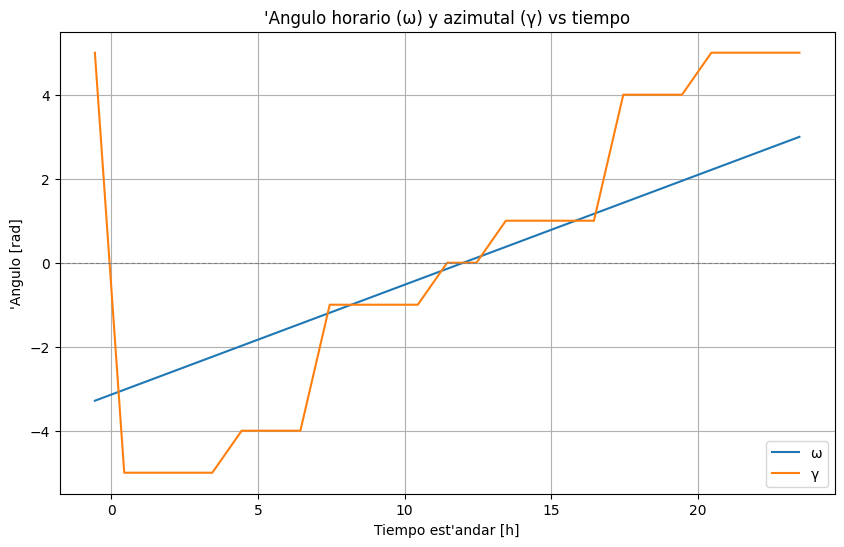

In [14]:
plt.figure(figsize=(10,6))
plt.plot(t_sol, omega, label="ω")
plt.plot(t_sol, gamma, label="γ")

plt.axhline(0, color="gray", linestyle="--", linewidth=0.8)
plt.xlabel("Tiempo est'andar [h]")
plt.ylabel("'Angulo [rad]")
plt.title("'Angulo horario (ω) y azimutal (γ) vs tiempo")
plt.legend()
plt.grid(True)
plt.show()

In [15]:
#altura
alpha = np.arcsin(np.sin(phi) * np.sin(delta) + np.cos(phi) * np.cos(delta) * np.cos(omega))
#cenital
theta_z = pi / 2 - alpha

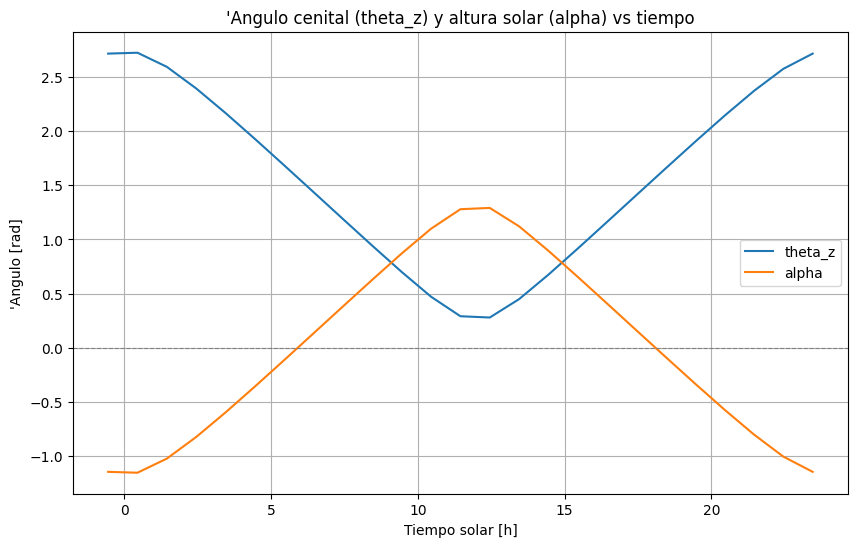

In [16]:
plt.figure(figsize=(10,6))
plt.plot(t_sol, theta_z, label="theta_z")
plt.plot(t_sol, alpha, label="alpha")

plt.axhline(0, color="gray", linestyle="--", linewidth=0.8)
plt.xlabel("Tiempo solar [h]")
plt.ylabel("'Angulo [rad]")
plt.title("'Angulo cenital (theta_z) y altura solar (alpha) vs tiempo")
plt.legend()
plt.grid(True)
plt.show()